# HMM Poisson will be used to find the hidden states (labels) based the movement data

In [ ]:
# HMM Gaussian or GMM model will be used to find the hidden states (labels) based the movement data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay

**Define a path to file**

In [ ]:
path='path=/Users/MarenLab/FP/Model/'

**Choose the dataset of the animal to be analysed**

In [ ]:
cols=['Time', 'SP1', 'SP2', 'SP3', 'SP4', 'SP5', 'SP6', 'MT3', 'MT7', 'MT8']

Obs. Please note that there are several variations of the dataset. Taking as an example the dataset of the first animal, that is, 'SP1'

(raw data just resampled) SP1_data_extinction.csv

(derivative of the raw data above) SP1_data_extinction_der.csv

(detrended and resample raw data) SP1_data_extinction_det.csv

(The result of filtering with SG) SP1_data_extinction_sg.csv

(The derivative of the previous data) SP1_data_extinction_sg_der.csv

(detrend idea) SP1_data_extinction_sg_fl.csv

(Detrended raw data normalized as Totty did) SP1_data_extinction_zs.csv

**In the example I am using the raw data**

In [ ]:
which_col='MT8'
print(f"Reading {which_col} data")
df = pd.read_csv(path+f"{which_col}_data_extinction.csv")

Reading MT8 data


In [ ]:
display(df)

,Times,Ff,Movement,Freezing
0,0.033333,6.399984,75,0
1,0.066667,6.369068,49,0
2,0.100000,6.337633,33,0
3,0.133333,6.305678,0,0
4,0.166667,6.273203,13,0
...,...,...,...,...
35995,1199.866676,3.950167,575,0
35996,1199.900010,4.111398,444,0
35997,1199.933343,4.273963,64,0
35998,1199.966676,4.437849,296,0


In [ ]:
# Define the sequence data and time
sequence_Movement=df["Movement"].values
sequence_Freezing=df["Freezing"].values
timest = df["Times"].values

In [ ]:
states = pd.unique(sequence_Freezing)
print("Unique states:")
print(states)

Unique states:
[0 1]


In [ ]:
sequence_Movement = sequence_Movement.reshape(-1, 1)

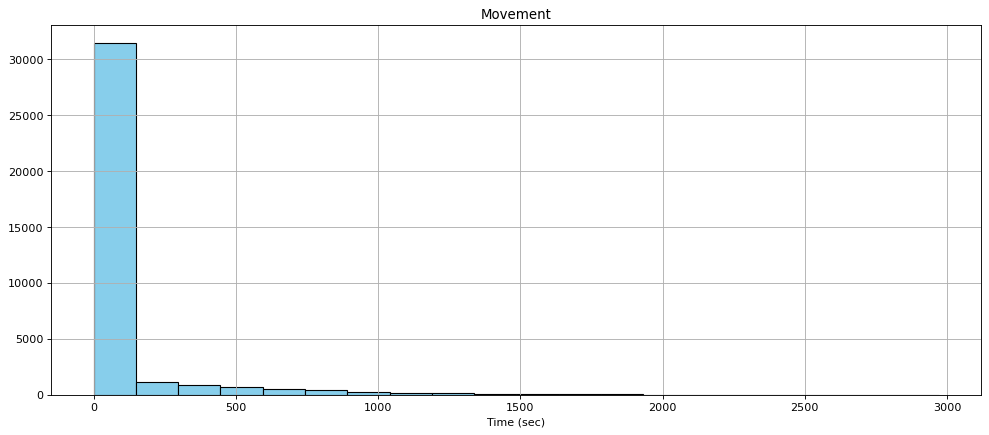

In [ ]:
plt.figure(figsize=(15, 6), dpi=80)
plt.hist(df["Movement"].values, bins=20, color='skyblue', edgecolor='black')
#plt.ylabel("Amplitude")
plt.xlabel("Time (sec)")
plt.title("Movement")
#plt.legend()
plt.grid()
pass

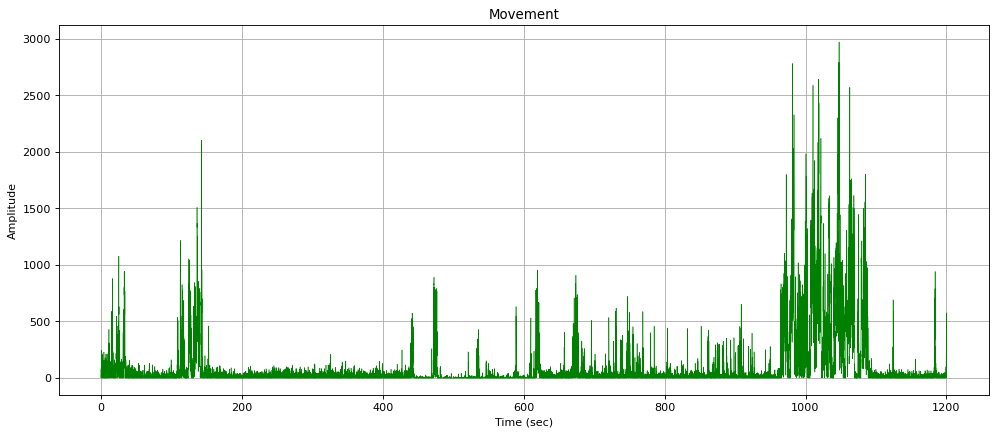

In [ ]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(df["Times"].values,df["Movement"].values, label='Movement', color='green', lw=0.5)
plt.ylabel("Amplitude")
plt.xlabel("Time (sec)")
plt.title("Movement")
#plt.legend()
plt.grid()
pass

In [ ]:
# Split the sequence Ff and Freezing into training and testing sets
train_data, test_data = train_test_split(sequence_Movement, test_size=0.2, shuffle=False)
train_label, test_label = train_test_split(sequence_Freezing, test_size=0.2, shuffle=False)

# Define the time vector for training and testing
train_time = timest[:len(train_data)]
test_time = timest[(len(train_data)):]

# Define the HMM model
model = hmm.PoissonHMM(n_components= 2, random_state=100, n_iter=20)

# Train the HMM model on the training data
model.fit(train_data)

# Evaluate the model on the testing data
log_likelihood = model.score(test_data)
print("Log Likelihood on Testing Data:", log_likelihood)

Log Likelihood on Testing Data: -909052.2444635443


In [ ]:
# Generate the estimated sequence of hidden states for the train data
estimated_hidden_states_train = model.predict(train_data)

# Print the estimated sequence of hidden states for the train data
print("Estimated Sequence of Hidden States for Train Data:")
display(estimated_hidden_states_train)

Estimated Sequence of Hidden States for Train Data:


array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
# Accuracy on the train data

accuracy_train = accuracy_score(train_label, estimated_hidden_states_train)
print(f'Accuracy on the train data: {accuracy_train}')

# Generate confusion matrix
conf_matrix_train = confusion_matrix(train_label, estimated_hidden_states_train)

print("\nConfusion Matrix:\n", conf_matrix_train)

# Detailed classification report
class_report_train = classification_report(train_label, estimated_hidden_states_train)
print("\nClassification Report:\n", class_report_train)

Accuracy on the train data: 0.9585416666666666

Confusion Matrix:
 [[ 1727   614]
 [  580 25879]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74      2341
           1       0.98      0.98      0.98     26459

    accuracy                           0.96     28800
   macro avg       0.86      0.86      0.86     28800
weighted avg       0.96      0.96      0.96     28800



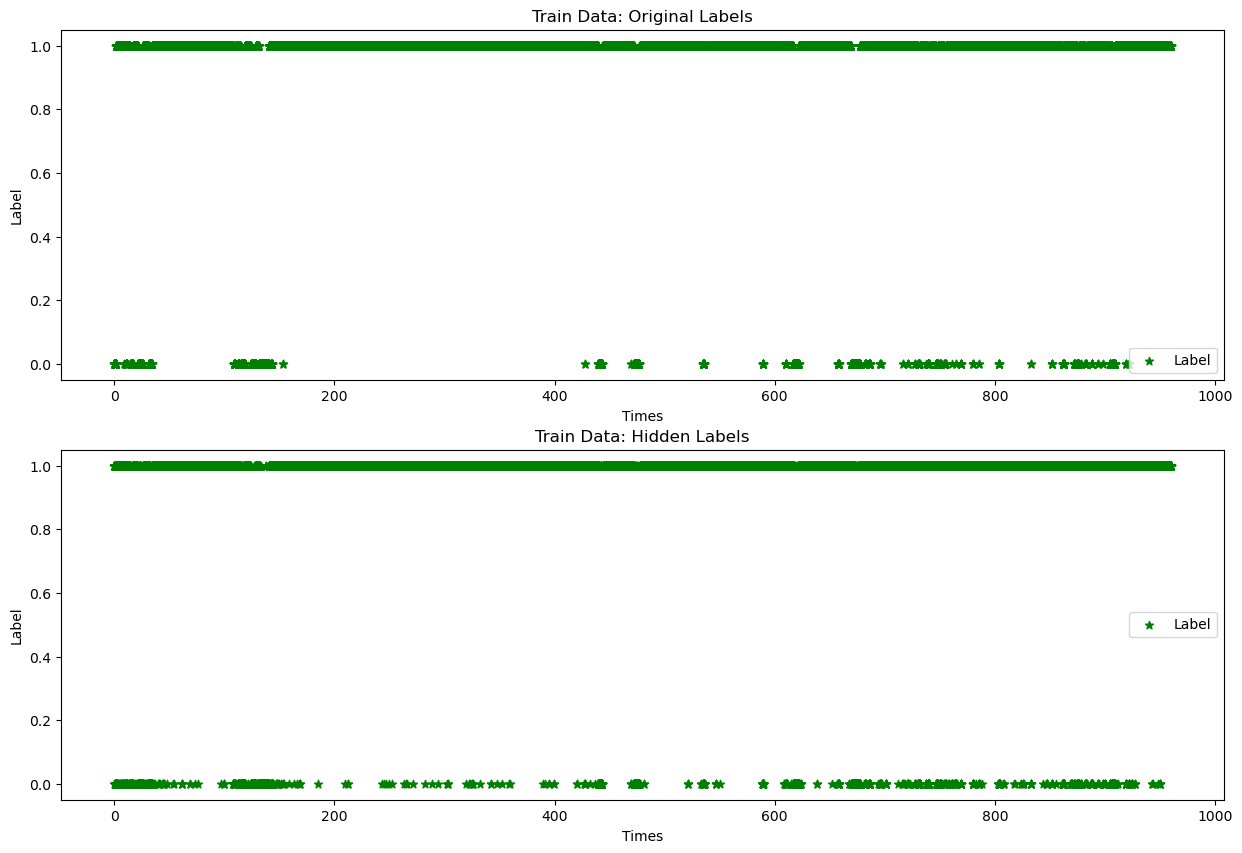

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.scatter(train_time,train_label, label='Label', color='green', marker='*')
plt.ylabel("Label")
plt.xlabel("Times")
plt.title("Train Data: Original Labels")
plt.legend()
plt.subplot(2,1,2)
plt.scatter(train_time,estimated_hidden_states_train, label='Label', color='green', marker='*')
plt.ylabel("Label")
plt.xlabel("Times")
plt.title("Train Data: Hidden Labels")
plt.legend()
plt.show()

In [ ]:
# Generate the estimated sequence of hidden states for the test data
estimated_hidden_states_test = model.predict(test_data)

# Print the estimated sequence of hidden states for the test data
print("Estimated Sequence of Hidden States for Test Data:")
display(estimated_hidden_states_test)

Estimated Sequence of Hidden States for Test Data:


array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
# Accuracy on the test data

accuracy_test = accuracy_score(test_label, estimated_hidden_states_test)
print(f'Accuracy on the test data: {accuracy_test}')

# Generate confusion matrix
conf_matrix_test = confusion_matrix(test_label, estimated_hidden_states_test)

print("\nConfusion Matrix:\n", conf_matrix_test)

# Detailed classification report
class_report_test = classification_report(test_label, estimated_hidden_states_test)
print("\nClassification Report:\n", class_report_test)

Accuracy on the test data: 0.9411111111111111

Confusion Matrix:
 [[2962  336]
 [  88 3814]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      3298
           1       0.92      0.98      0.95      3902

    accuracy                           0.94      7200
   macro avg       0.95      0.94      0.94      7200
weighted avg       0.94      0.94      0.94      7200



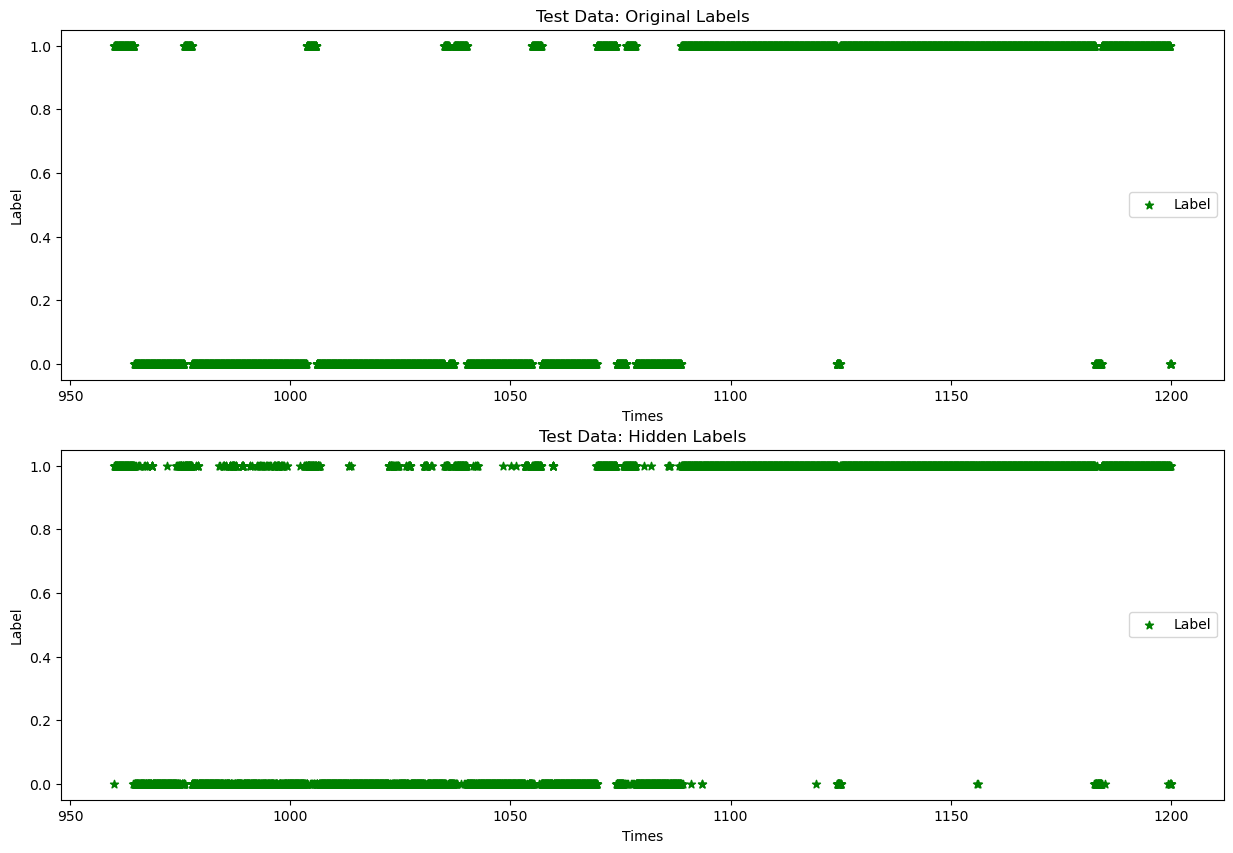

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.scatter(test_time,test_label, label='Label', color='green', marker='*')
plt.ylabel("Label")
plt.xlabel("Times")
plt.title("Test Data: Original Labels")
plt.legend()
plt.subplot(2,1,2)
plt.scatter(test_time,estimated_hidden_states_test, label='Label', color='green', marker='*')
plt.ylabel("Label")
plt.xlabel("Times")
plt.title("Test Data: Hidden Labels")
plt.legend()
plt.show()

In [ ]:
#
#
# Out of curiosity, let's assess how the model performs in relation to the calcium values.
#
#

In [ ]:
# Generate the estimated sequence of hidden states for the test data
estimated_hidden_states = model.predict(train_data)

# Print the estimated sequence of hidden states for the test data
print("Estimated Sequence of Hidden States for Train Data:")
display(estimated_hidden_states)

Estimated Sequence of Hidden States for Train Data:


array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
# Generate a sequence of observations based on the estimated sequence of hidden states
# We can use the `sample()` method to generate a sequence of observations given a sequence of hidden states
predicted_sequence_train, _ = model.sample(n_samples=len(train_data))

# Print the predicted sequence of observations
print("Predicted Sequence of Observations on the train data:")
display(predicted_sequence_train)

Predicted Sequence of Observations on the train data:


array([[312],
       [  6],
       [  9],
       ...,
       [ 12],
       [ 12],
       [  7]])

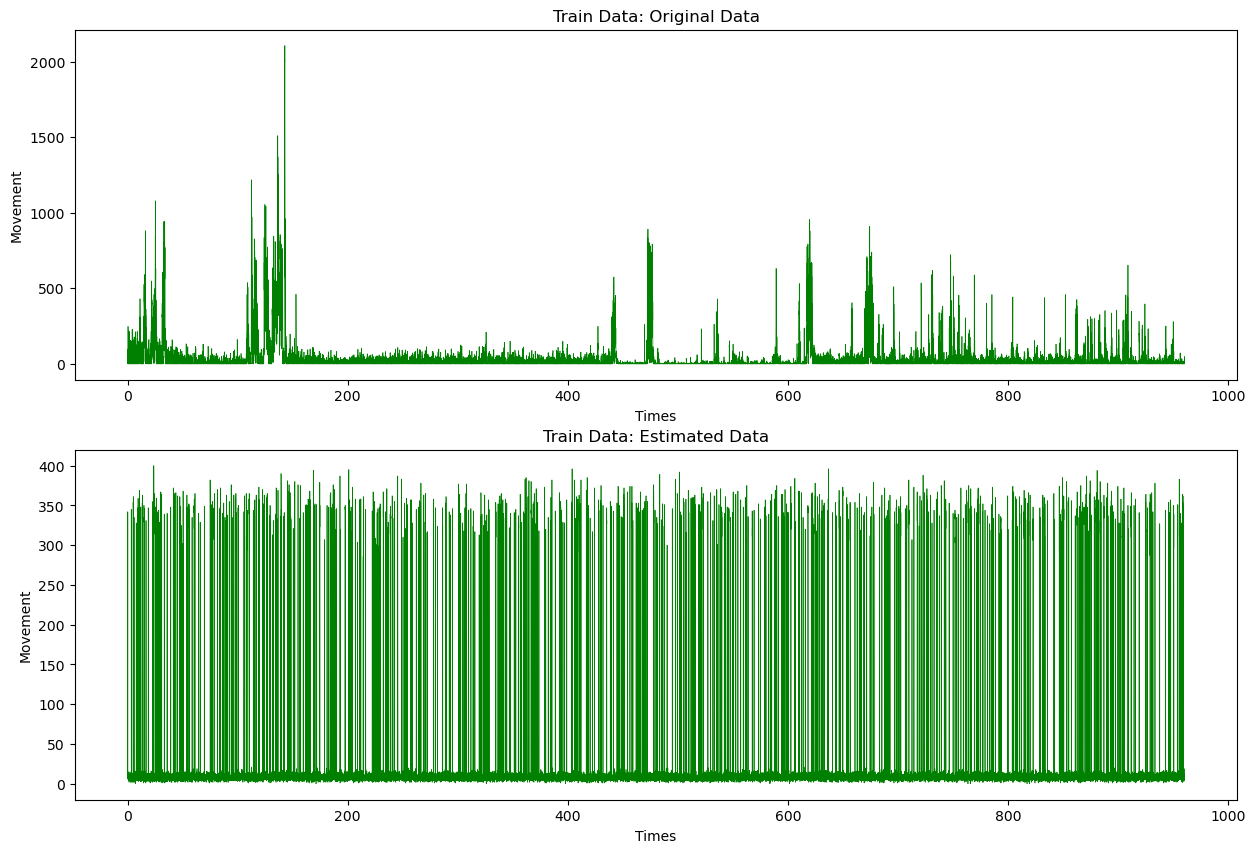

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(train_time,train_data, label='Ff', color='green', lw=0.5
        )
plt.ylabel("Movement")
plt.xlabel("Times")
plt.title("Train Data: Original Data")
#plt.legend()
plt.subplot(2,1,2)
plt.plot(train_time,predicted_sequence_train, label='Ff', color='green',lw=0.5)
plt.ylabel("Movement")
plt.xlabel("Times")
plt.title("Train Data: Estimated Data")
#plt.legend()
plt.show()

In [ ]:
# Generate a sequence of observations based on the estimated sequence of hidden states
# We can use the `sample()` method to generate a sequence of observations given a sequence of hidden states
predicted_sequence_test, _ = model.sample(n_samples=len(test_data))

# Print the predicted sequence of observations
print("Predicted Sequence of Observations:")
print(predicted_sequence_test)

Predicted Sequence of Observations:
[[355]
 [  8]
 [  9]
 ...
 [  7]
 [ 13]
 [  7]]


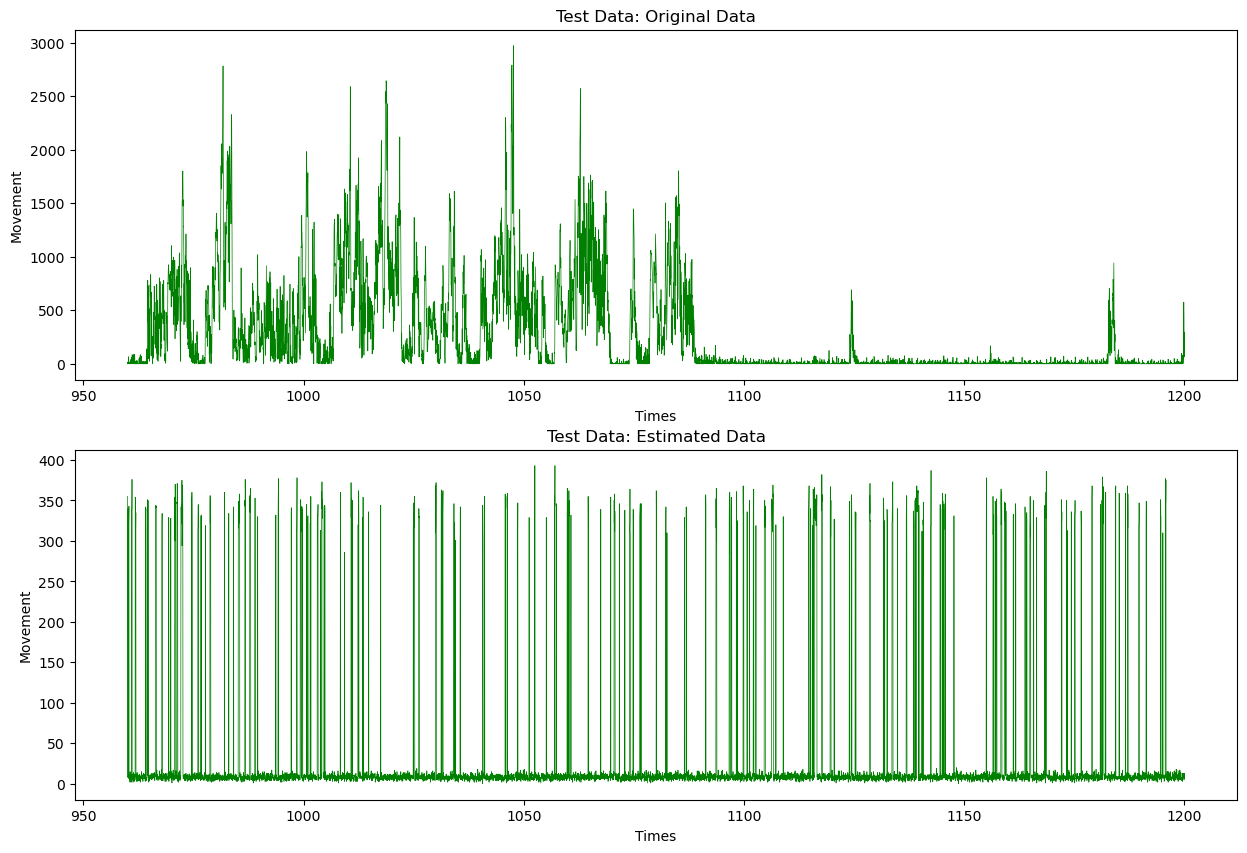

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(test_time,test_data, label='Movement', color='green', lw=0.5
        )
plt.ylabel("Movement")
plt.xlabel("Times")
plt.title("Test Data: Original Data")
#plt.legend()
plt.subplot(2,1,2)
plt.plot(test_time,predicted_sequence_test, label='Ff', color='green',lw=0.5)
plt.ylabel("Movement")
plt.xlabel("Times")
plt.title("Test Data: Estimated Data")
#plt.legend()
plt.show()

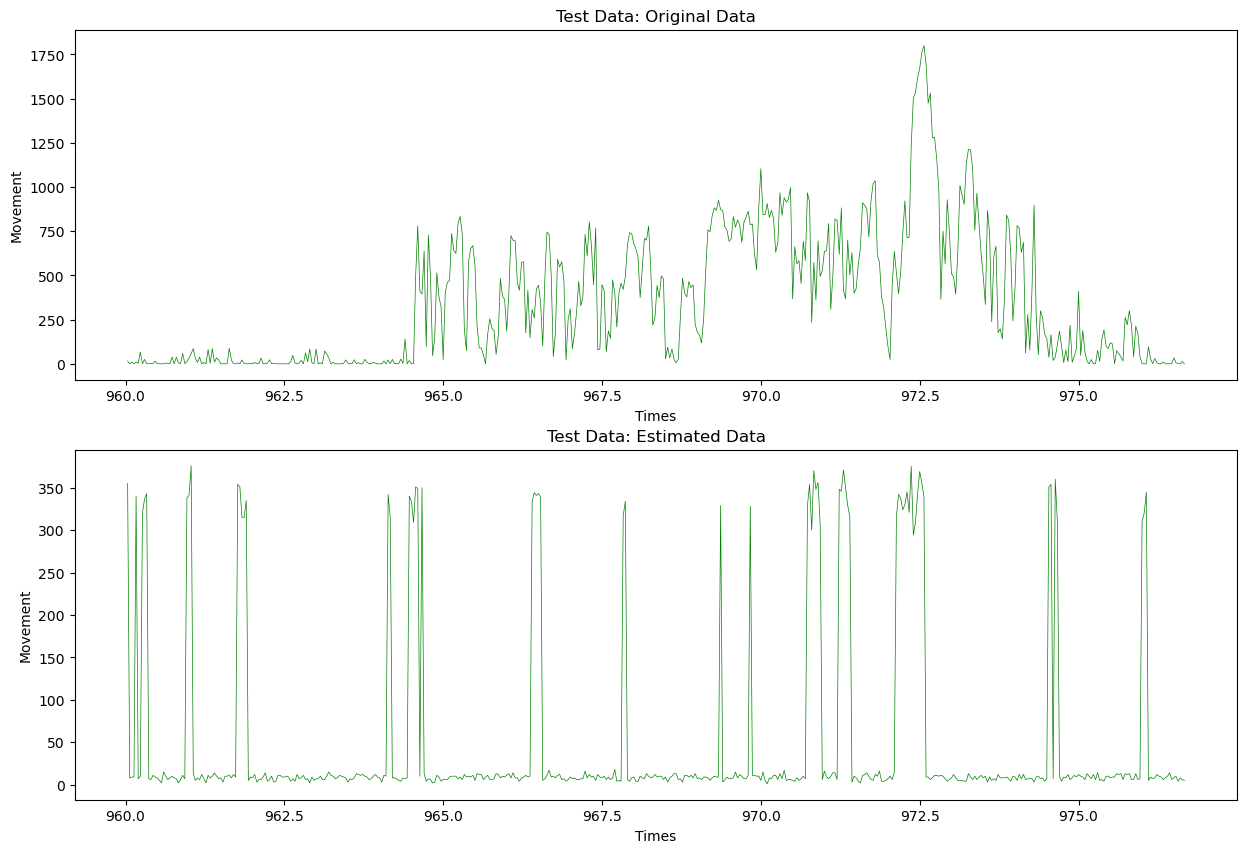

In [ ]:
leng=500
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(test_time[:leng],test_data[:leng], label='Movement', color='green', lw=0.5
        )
plt.ylabel("Movement")
plt.xlabel("Times")
plt.title("Test Data: Original Data")
#plt.legend()
plt.subplot(2,1,2)
plt.plot(test_time[:leng],predicted_sequence_test[:leng], label='Movement', color='green',lw=0.5)
plt.ylabel("Movement")
plt.xlabel("Times")
plt.title("Test Data: Estimated Data")
#plt.legend()
plt.show()

Text(0.5, 0, 'Time (sec)')

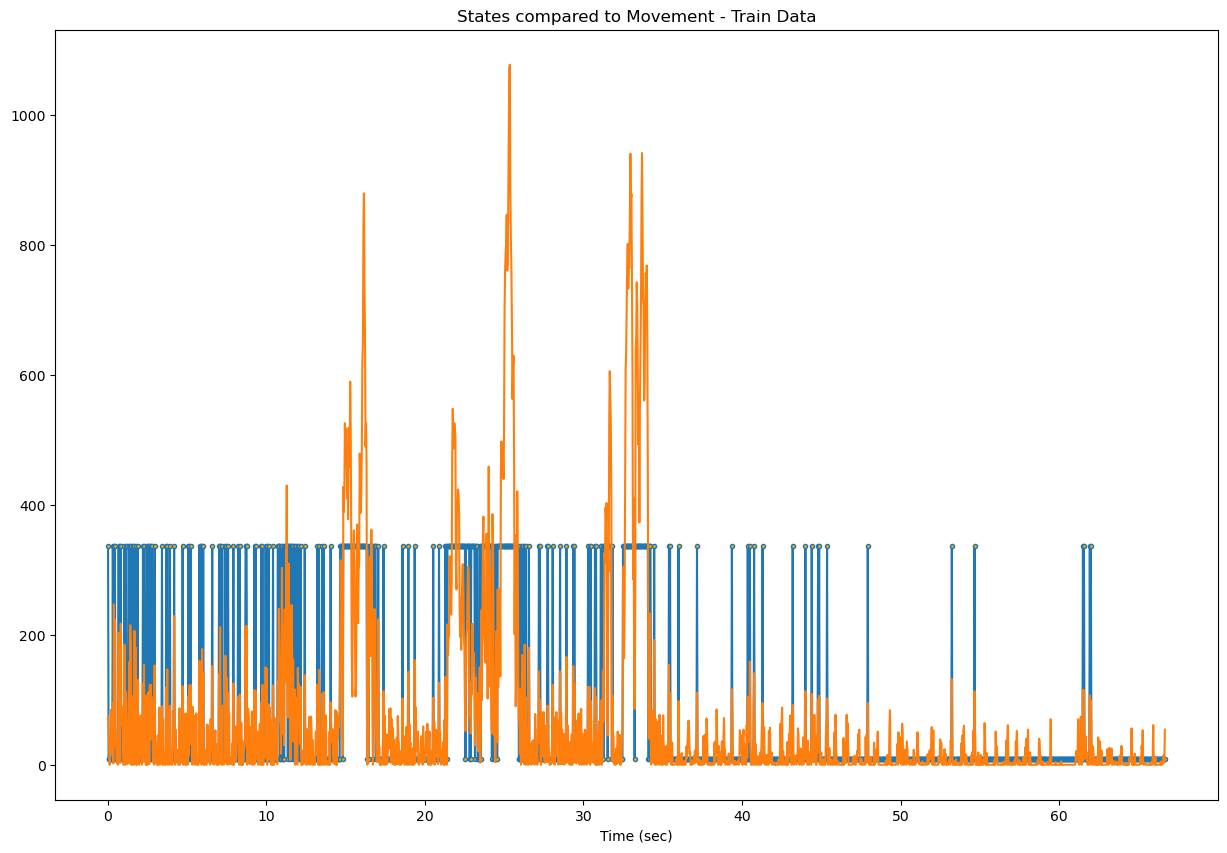

In [ ]:
# plot model states over time
leng=2000
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(train_time[:leng],model.lambdas_[estimated_hidden_states_train[:leng]], ".-", ms=6, mfc="orange")
ax.plot(train_time[:leng],train_data[:leng])
ax.set_title('States compared to Movement - Train Data')
ax.set_xlabel('Time (sec)')

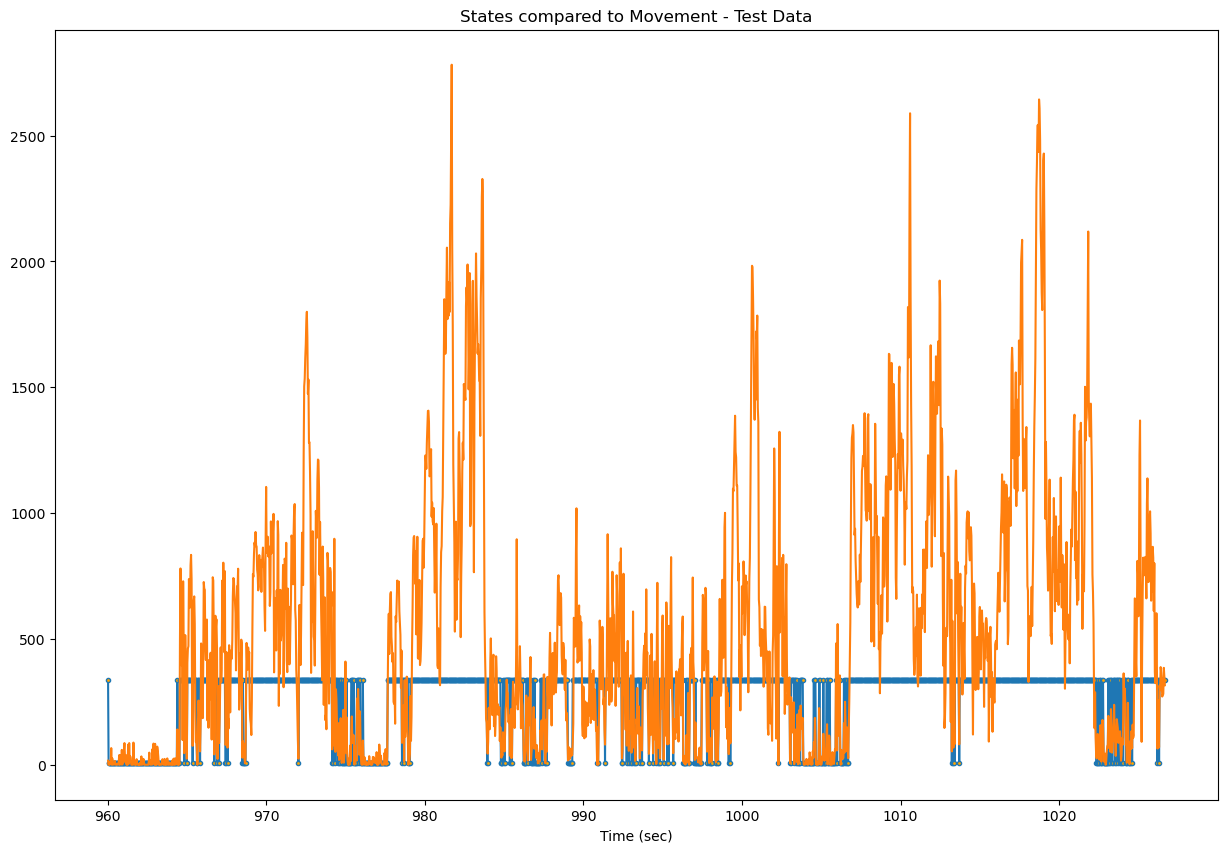

In [ ]:
# plot model states over time
leng=2000
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(test_time[:leng],model.lambdas_[estimated_hidden_states_test[:leng]], ".-", ms=6, mfc="orange")
ax.plot(test_time[:leng],test_data[:leng])
ax.set_title('States compared to Movement - Test Data')
ax.set_xlabel('Time (sec)')
plt.show()

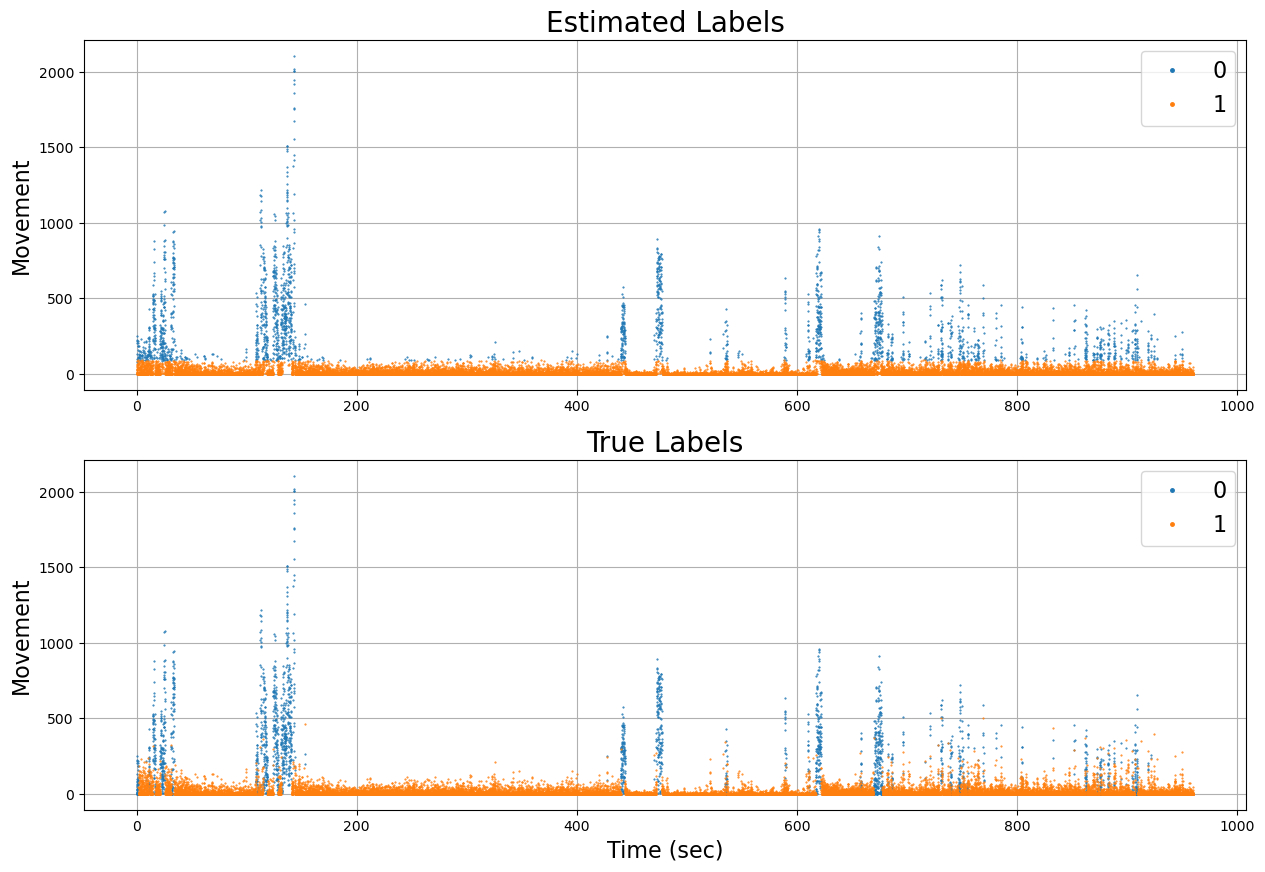

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (estimated_hidden_states_train == i)
    x = train_time[want]
    y = train_data[want]
    plt.plot(x, y, '.', markersize = 1)
plt.legend(states, fontsize=16, loc='upper right', markerscale=5.)
plt.grid(True)
#plt.xlabel("Time (sec)", fontsize=16)
plt.ylabel("Movement", fontsize=16)
plt.title("Estimated Labels",fontsize=20)
plt.subplot(2,1,2)
for i in states:
    want = (train_label == i)
    x = train_time[want]
    y = train_data[want]
    plt.plot(x, y, '.', markersize = 1)
plt.legend(states, fontsize=16, loc='upper right', markerscale=5.)
plt.grid(True)
plt.xlabel("Time (sec)", fontsize=16)
plt.ylabel("Movement", fontsize=16)
plt.title("True Labels",fontsize=20)
plt.show()

In [ ]:
ileng=3000
fleng=4000
fleng=min(fleng,len(train_time))
ileng=min(ileng,fleng-10)
display(ileng)
display(fleng)

3000

4000

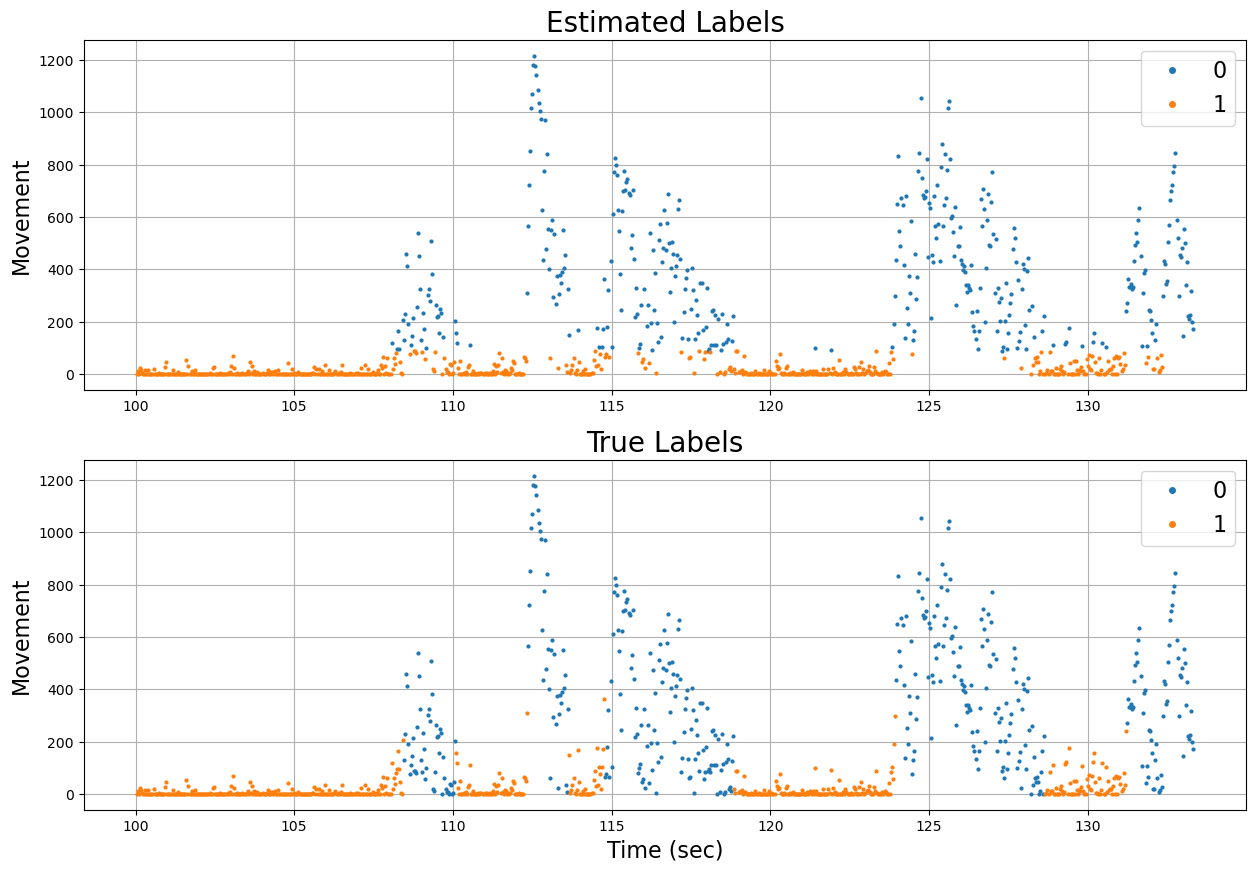

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (estimated_hidden_states_train[ileng:fleng] == i)
    x = train_time[ileng:fleng][want]
    y = train_data[ileng:fleng][want]
    plt.plot(x, y, '.', markersize = 4)
plt.legend(states, fontsize=16, loc='upper right', markerscale=2.)
plt.grid(True)
#plt.xlabel("Time (sec)", fontsize=16)
plt.ylabel("Movement", fontsize=16)
plt.title("Estimated Labels",fontsize=20)
plt.subplot(2,1,2)
for i in states:
    want = (train_label[ileng:fleng] == i)
    x = train_time[ileng:fleng][want]
    y = train_data[ileng:fleng][want]
    plt.plot(x, y, '.', markersize = 4)
plt.legend(states, fontsize=16, loc='upper right', markerscale=2.)
plt.grid(True)
plt.xlabel("Time (sec)", fontsize=16)
plt.ylabel("Movement", fontsize=16)
plt.title("True Labels",fontsize=20)
plt.show()

In [2]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (estimated_hidden_states_test == i)
    x = test_time[want]
    y = test_data[want]
    plt.plot(x, y, '.', markersize = 1)
plt.legend(states, fontsize=16, loc='upper right', markerscale=5.)
plt.grid(True)
#plt.xlabel("Time (sec)", fontsize=16)
plt.ylabel("Movement", fontsize=16)
plt.title("Estimated Labels (Test)",fontsize=20)
plt.subplot(2,1,2)
for i in states:
    want = (test_label == i)
    x = test_time[want]
    y = test_data[want]
    plt.plot(x, y, '.', markersize = 1)
plt.legend(states, fontsize=16, loc='upper right', markerscale=5.)
plt.grid(True)
plt.xlabel("Time (sec)", fontsize=16)
plt.ylabel("Movement", fontsize=16)
plt.title("True Labels (Test)",fontsize=20)
plt.show()

NameError: name 'plt' is not defined

## Display accuracy and other metrics again

In [ ]:
print(f'\nResults obtained by using a Hidden Markov Model\n')
print(f'Animal: {which_col}\n')
print(f'Variable used as input: Calcium\n')
print('Train Data\n')
print(f'Accuracy on the test data: {accuracy_train}')
print("\nConfusion Matrix:\n", conf_matrix_train)
print("\nClassification Report:\n\n", class_report_train)
print('Test Data\n')
print(f'Accuracy on the test data: {accuracy_test}')
print("\nConfusion Matrix:\n", conf_matrix_test)
print("\nClassification Report:\n", class_report_test)


Results obtained by using a Hidden Markov Model

Animal: MT8

Variable used as input: Calcium

Train Data

Accuracy on the test data: 0.9585416666666666

Confusion Matrix:
 [[ 1727   614]
 [  580 25879]]

Classification Report:

               precision    recall  f1-score   support

           0       0.75      0.74      0.74      2341
           1       0.98      0.98      0.98     26459

    accuracy                           0.96     28800
   macro avg       0.86      0.86      0.86     28800
weighted avg       0.96      0.96      0.96     28800

Test Data

Accuracy on the test data: 0.9411111111111111

Confusion Matrix:
 [[2962  336]
 [  88 3814]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      3298
           1       0.92      0.98      0.95      3902

    accuracy                           0.94      7200
   macro avg       0.95      0.94      0.94      7200
weighted avg       0.94      0.94      0.

## Save accuracy

In [ ]:
data={'Accuracy': accuracy_train, 'Confusion Matrix': conf_matrix_train, 'Classification Report': class_report_train}

In [ ]:
#np.savez(f'{path}Results_{which_col}_HMM_Movement_train.npz', **data)

In [ ]:
data={'Accuracy': accuracy_test, 'Confusion Matrix': conf_matrix_test, 'Classification Report': class_report_test}

In [ ]:
#np.savez(f'{path}Results_{which_col}_HMM_Movement_test.npz', **data)